# Raw Data vs PCA

**Index**:
- [Ensembles](#Ensembles)
    - [Preprocessing](#preprocessing-of-the-ensemble-results)
    - [Analysis of the results](#Analysis-of-the-ensemble-results)
        - [General plots](#General-plots-for-the-ensemble-results)
        - [Plots per class](#Plots-for-the-ensemble-results-per-class)
        - [General table](#General-table-for-the-ensemble-results)
        - [Table per class](#Tables-per-class-for-the-ensemble-results)

In [1]:
using Serialization
using DataStructures

In [2]:
include("plotting.jl")

generateComparisonTable (generic function with 2 methods)

## Preprocessing of the ensemble results

Load the results of first approach:

In [3]:
results_folder = "results/"
filename_1 = results_folder * "2_ensemble_results.jl"

# Load the results
approach1_obj = open(filename_1, "r") do file
  deserialize(file)
end

Dict{Symbol, Dict{String, Any}} with 3 entries:
  :Voting_Hard => Dict("class_results"=>[Dict(:recall=>[0.936199, 0.830846, 0.7…
  :Voting_Soft => Dict("class_results"=>[Dict(:recall=>[0.887233, 0.755634, 0.7…
  :Stacking    => Dict("class_results"=>[Dict(:recall=>[0.870399, 0.769014, 0.7…

The same for the second approach:

In [4]:
filename_2 = results_folder * "4_ensemble_results.jl"

# Load the results
approach2_obj = open(filename_2, "r") do file
  deserialize(file)
end

Dict{Symbol, Dict{String, Any}} with 3 entries:
  :Voting_Hard => Dict("class_results"=>[Dict(:recall=>[0.708772, 0.657042, 0.6…
  :Voting_Soft => Dict("class_results"=>[Dict(:recall=>[0.699649, 0.664085, 0.7…
  :Stacking    => Dict("class_results"=>[Dict(:recall=>[0.750877, 0.725352, 0.7…

Now, let's put in the same object the results of both approaches:

In [5]:
loaded_obj = OrderedDict(
    :Voting_Soft_Raw => approach1_obj[:Voting_Soft],
    :Voting_Soft_PCA => approach2_obj[:Voting_Soft],
    :Voting_Hard_Raw => approach1_obj[:Voting_Hard],
    :Voting_Hard_PCA => approach2_obj[:Voting_Hard],
    :Stacking_Raw => approach1_obj[:Stacking],
    :Stacking_PCA => approach2_obj[:Stacking],
)

OrderedDict{Symbol, Dict{String, Any}} with 6 entries:
  :Voting_Soft_Raw => Dict("class_results"=>[Dict(:recall=>[0.887233, 0.755634,…
  :Voting_Soft_PCA => Dict("class_results"=>[Dict(:recall=>[0.699649, 0.664085,…
  :Voting_Hard_Raw => Dict("class_results"=>[Dict(:recall=>[0.936199, 0.830846,…
  :Voting_Hard_PCA => Dict("class_results"=>[Dict(:recall=>[0.708772, 0.657042,…
  :Stacking_Raw    => Dict("class_results"=>[Dict(:recall=>[0.870399, 0.769014,…
  :Stacking_PCA    => Dict("class_results"=>[Dict(:recall=>[0.750877, 0.725352,…

In [6]:
model_names, metrics, metric_means, metric_stds, metric_means_class, metric_stds_class, metric_maxes, metric_maxes_class = aggregateMetrics(loaded_obj, 3, ensemble=true)
plots_output_dir = "./plots/Comparison_2_4/"
tables_output_dir = "./tables/Comparison_2_4/"

"./tables/Comparison_2_4/"

## Analysis of the ensemble results

### General plots for the ensemble results

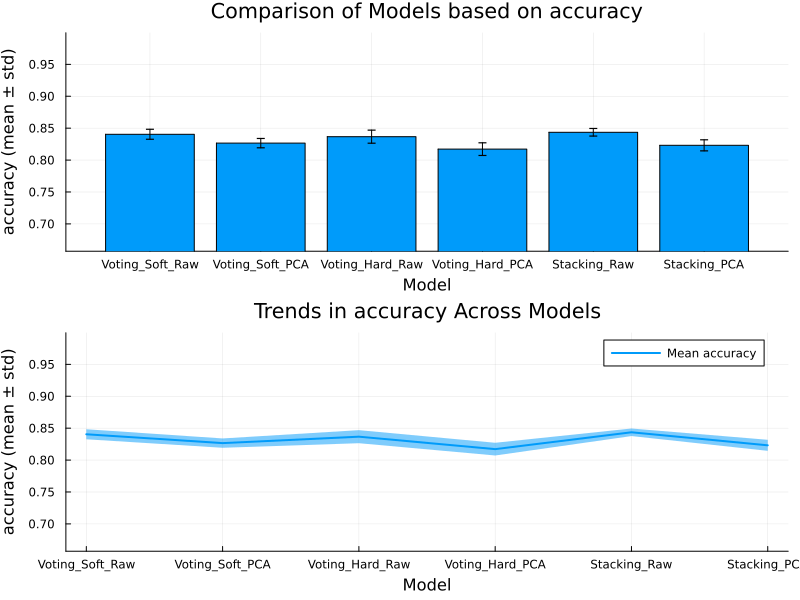

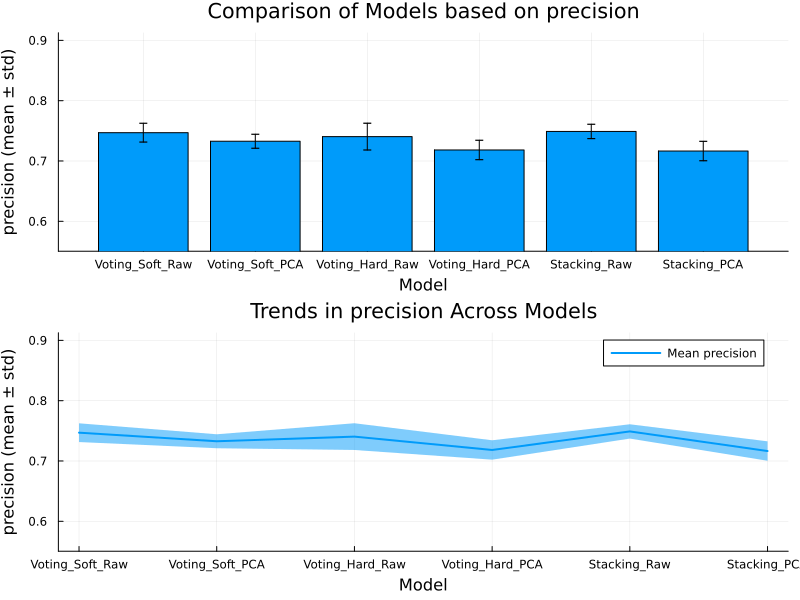

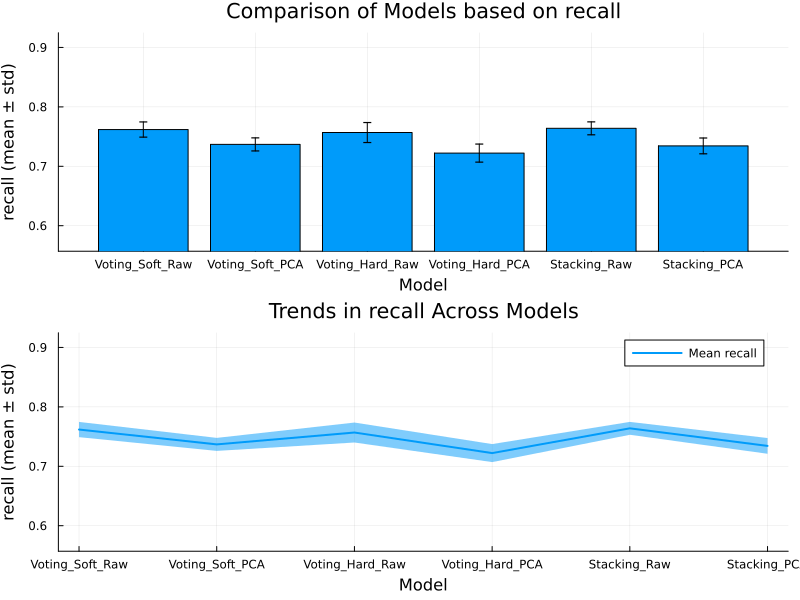

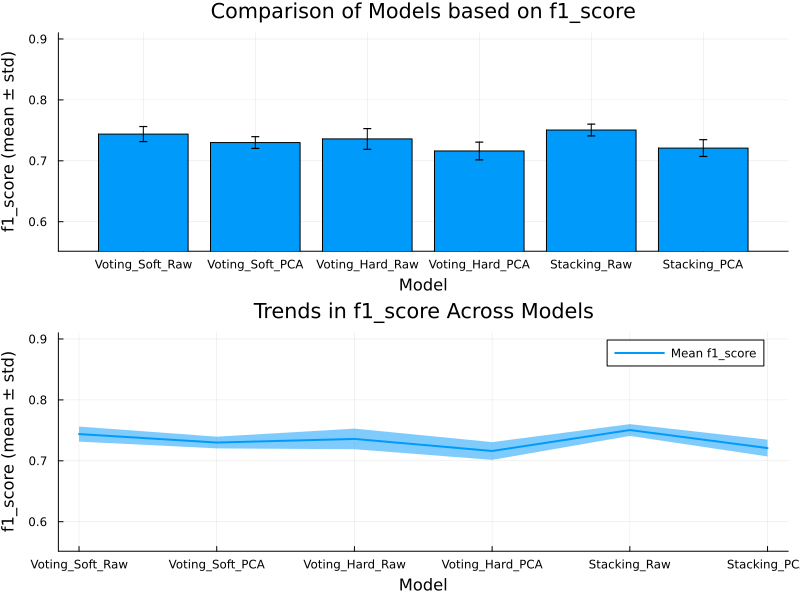

In [7]:
plotCombinedMetrics(model_names, metrics, metric_means, metric_stds, output_dir=plots_output_dir*"ensembles", show=true)

### Plots per class for the ensemble results

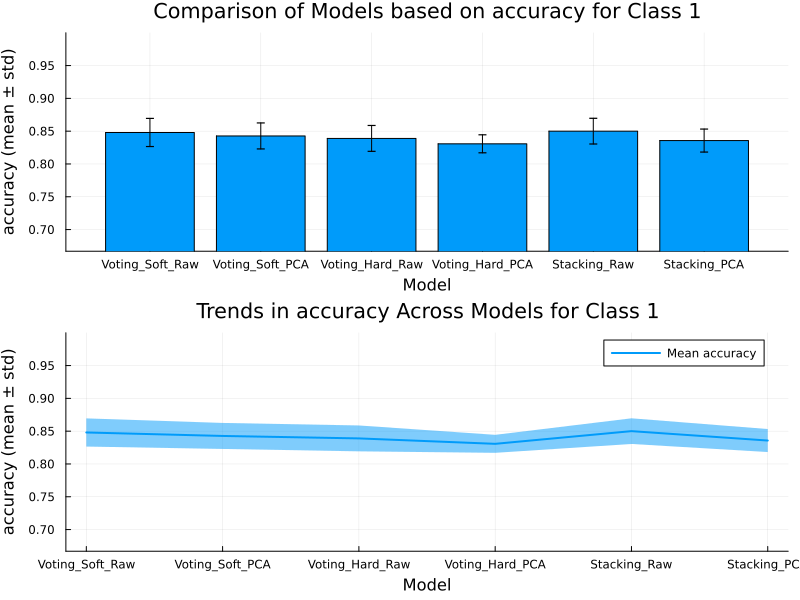

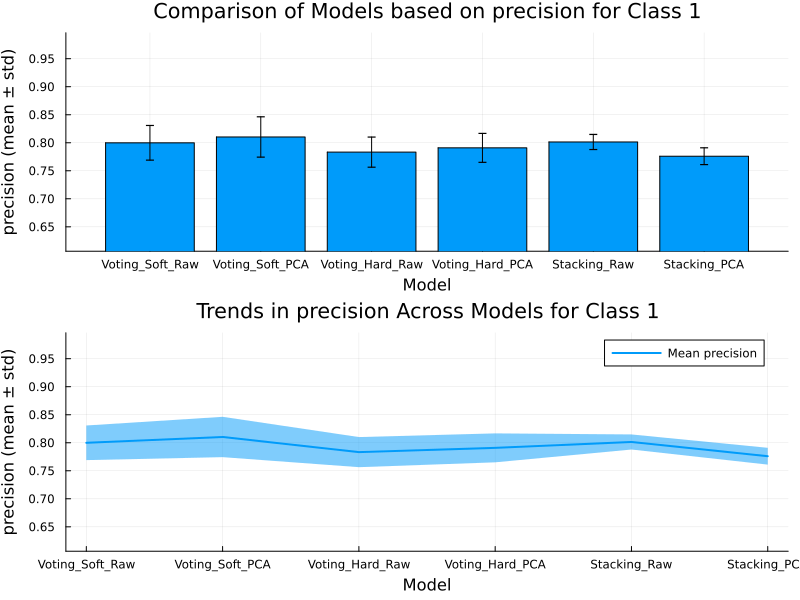

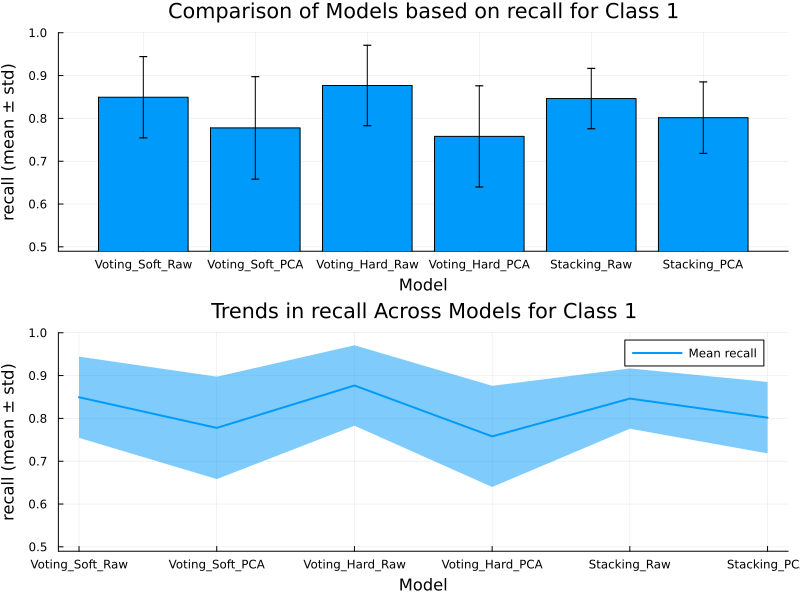

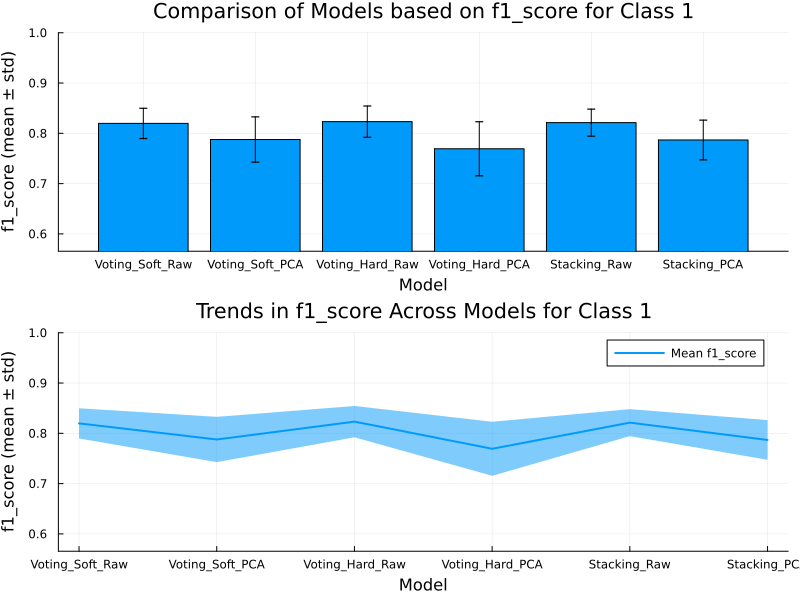

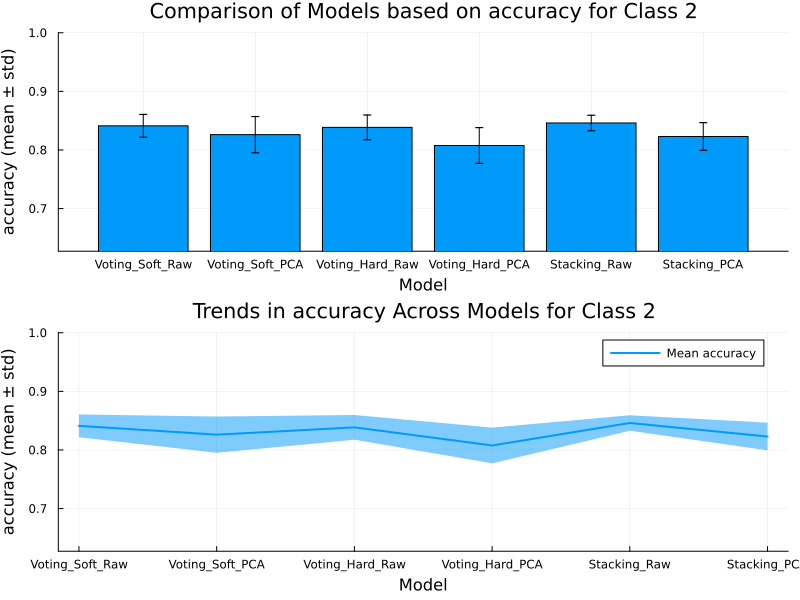

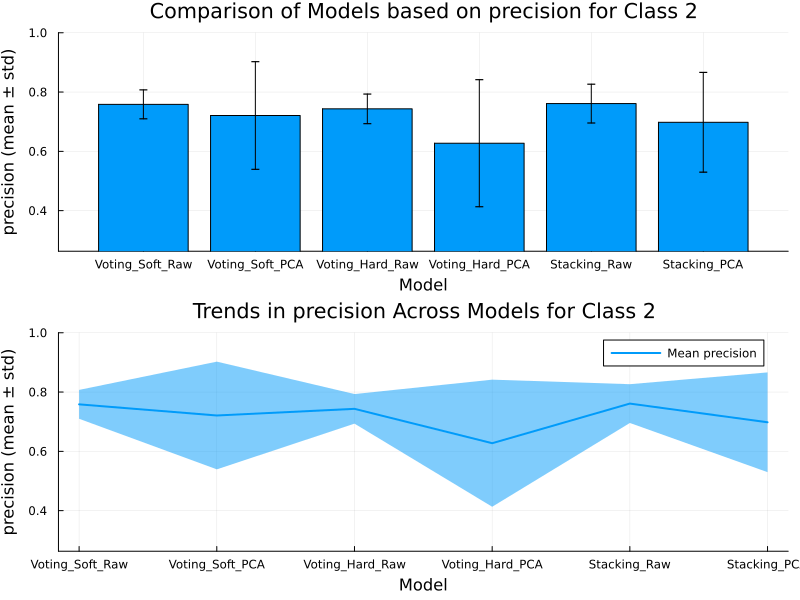

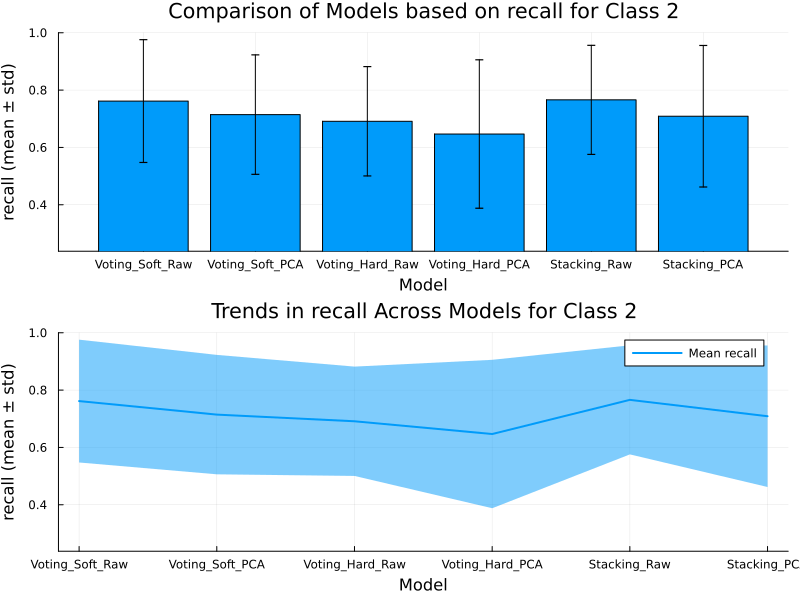

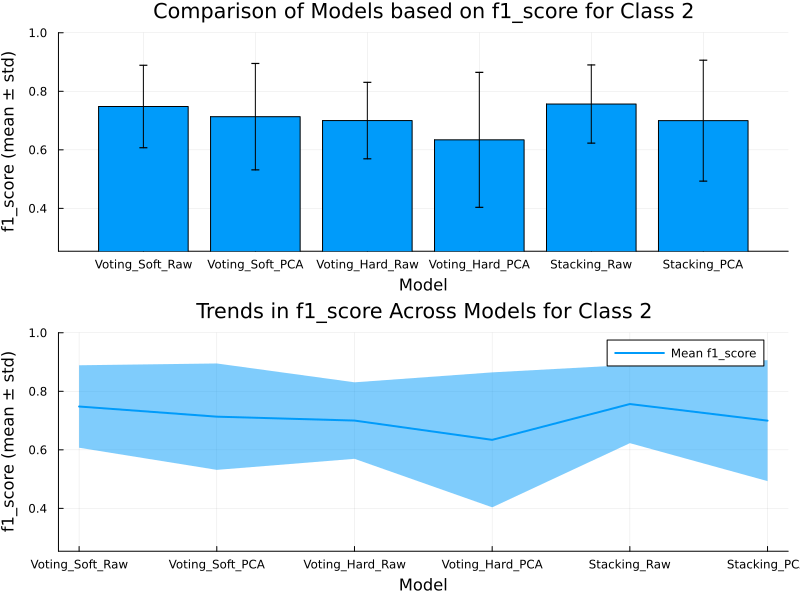

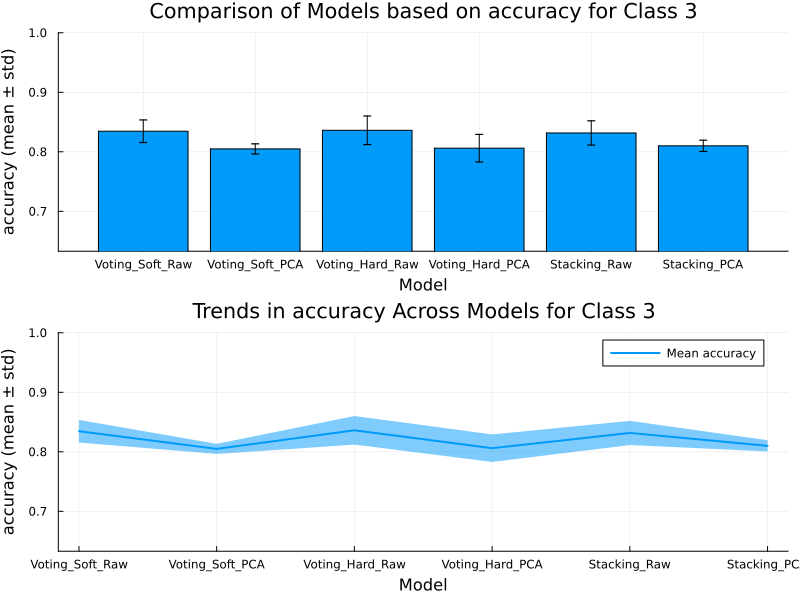

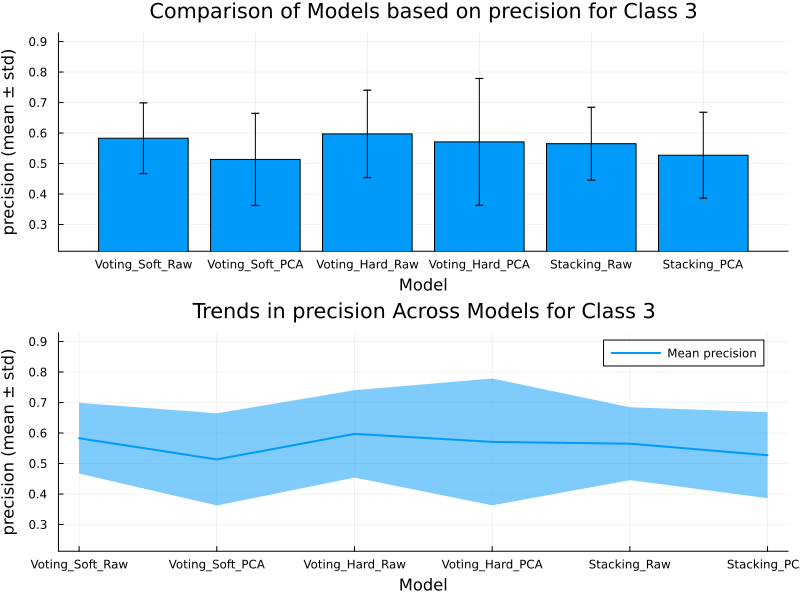

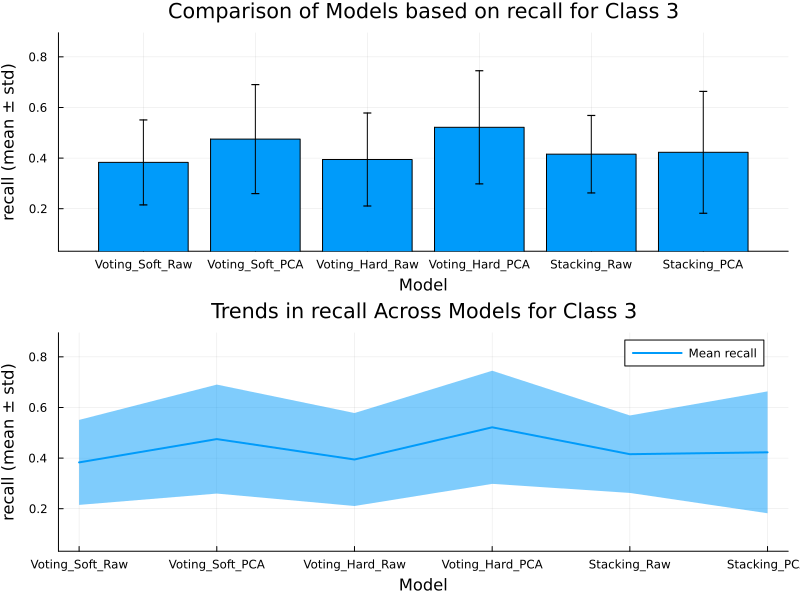

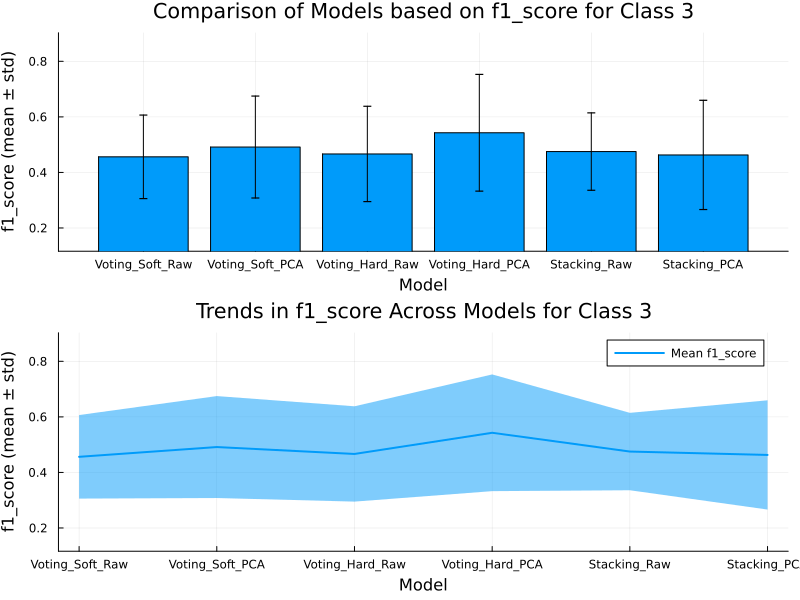

In [8]:
plotCombinedMetrics(model_names, 3, metrics, metric_means_class, metric_stds_class, output_dir=plots_output_dir*"ensembles/class", show=true)

### General table for the ensemble results

In [9]:
generateComparisonTable(model_names, metrics, metric_maxes; output_dir=tables_output_dir*"ensembles", sort_by=:f1_score, rev=true)


Comparison of Metrics Across Models (Sorted by f1_score):
┌─────────────────┬──────────┬───────────┬────────┬──────────┐
│           Model │ Accuracy │ Precision │ Recall │ F1-Score │
├─────────────────┼──────────┼───────────┼────────┼──────────┤
│    Stacking_Raw │     0.85 │     0.763 │  0.776 │    0.762 │
│ Voting_Soft_Raw │    0.849 │     0.766 │  0.776 │    0.758 │
│ Voting_Hard_Raw │     0.85 │     0.771 │  0.779 │    0.758 │
│ Voting_Soft_PCA │    0.835 │     0.746 │  0.749 │    0.742 │
│    Stacking_PCA │    0.834 │     0.736 │   0.75 │    0.737 │
│ Voting_Hard_PCA │    0.829 │      0.73 │  0.741 │    0.731 │
└─────────────────┴──────────┴───────────┴────────┴──────────┘


### Tables per class for the ensemble results

In [10]:
generateComparisonTable(model_names, 3, metrics, metric_maxes_class; output_dir =tables_output_dir*"ensembles/class", sort_by=:f1_score, rev=true)


Comparison of Metrics Across Models for Class 1 (Sorted by f1_score):
┌─────────────────┬──────────┬───────────┬────────┬──────────┐
│           Model │ Accuracy │ Precision │ Recall │ F1-Score │
├─────────────────┼──────────┼───────────┼────────┼──────────┤
│ Voting_Soft_Raw │    0.872 │     0.837 │  0.948 │    0.853 │
│ Voting_Hard_Raw │    0.863 │     0.822 │  0.958 │    0.853 │
│    Stacking_Raw │    0.871 │     0.816 │  0.925 │    0.852 │
│ Voting_Soft_PCA │    0.864 │     0.851 │  0.914 │    0.841 │
│ Voting_Hard_PCA │    0.844 │     0.823 │  0.902 │    0.834 │
│    Stacking_PCA │    0.852 │     0.795 │  0.896 │    0.832 │
└─────────────────┴──────────┴───────────┴────────┴──────────┘

Comparison of Metrics Across Models for Class 2 (Sorted by f1_score):
┌─────────────────┬──────────┬───────────┬────────┬──────────┐
│           Model │ Accuracy │ Precision │ Recall │ F1-Score │
├─────────────────┼──────────┼───────────┼────────┼──────────┤
│    Stacking_Raw │    0.864 │     0.79